In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns

In [39]:
conn = mysql.connector.connect(   # 데이터베이스에 연결 
    host = "localhost",
    user = "root",
    password = "Chayang0902!",
    database = "coupang_main"
)

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
cursor = conn.cursor()    # 제어하는 걸 가져옴

query = """CREATE TABLE IF NOT EXISTS tips (
total_bill FLOAT,
tip FLOAT,
sex VARCHAR(10), 
smoker VARCHAR(10),
day VARCHAR(10),
time VARCHAR(10),
size INT)"""

cursor.execute(query)

In [8]:
data = tips.values.tolist()

insert_query = """INSERT INTO tips (total_bill, tip, sex, smoker, day, time, size)
VALUES (%s, %s, %s, %s, %s, %s, %s)
"""

cursor.executemany(insert_query, data)
conn.commit()    # 확정

In [9]:
cursor.close()
conn.close()

# 코스피 스크래핑해온걸 sql에 불러오는법

In [10]:
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [18]:
url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1")
html = BeautifulSoup(url.text)

In [37]:
# 표 전체를 가져오고 싶다 
table = html.find("table", class_ = "type_2")
table = pd.read_html(str(table))[0]
del table["N"]
del table["토론실"]
table = table.dropna(subset = "종목명") 
table = table.dropna()

In [26]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 77
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     50 non-null     object 
 1   현재가     50 non-null     float64
 2   전일비     50 non-null     object 
 3   등락률     50 non-null     object 
 4   액면가     50 non-null     float64
 5   시가총액    50 non-null     float64
 6   상장주식수   50 non-null     float64
 7   외국인비율   50 non-null     float64
 8   거래량     50 non-null     float64
 9   PER     50 non-null     float64
 10  ROE     49 non-null     float64
dtypes: float64(8), object(3)
memory usage: 4.7+ KB


In [40]:
cursor = conn.cursor()  

query = """CREATE TABLE IF NOT EXISTS naver (
종목명 VARCHAR(50),
현재가 FLOAT,
전일비 VARCHAR(10), 
등락률 VARCHAR(10),
액면가 FLOAT,
시가총액 FLOAT,
상장주식수 FLOAT,
외국인비율 FLOAT,
거래량 FLOAT,
PER FLOAT,
ROE FLOAT)"""

cursor.execute(query)

In [41]:
insert_query = """INSERT INTO naver(종목명, 현재가, 전일비, 등락률, 액면가, 시가총액, 상장주식수, 외국인비율, 거래량, PER, ROE
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

In [42]:
data = table.values.tolist()
cursor.executemany(insert_query, data)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'VALUES ('삼성전자', 54600.0, '상승  1,000', '+1.87%', 100.0, 3232122.0, 59' at line 2

In [43]:
conn.commit()

In [35]:
cursor.close()
conn.close()

In [36]:
# 딥러닝의 원리 간단한 리뷰

In [57]:
# 공부시간이 성적에 영향을 미칠까?

import matplotlib.pyplot as plt
import numpy as np

x = np.array([2, 4, 6, 8])
y = np.array([20, 65, 50, 80])

a = 0     # 기울기
b = 0     # 절편 
lr = 0.005    # 학습률

for n in range(5000):    # 학습 5000번한다 = 미분 5000번한다 = error라는 산을 5000번내려온다
    y_hat = a * x + b
    error = y_hat - y

    a_diff = sum(2 * error * x)
    b_diff = sum(2 * error * 1)

    a -= a_diff * lr
    b -= b_diff * lr      
    # 숫자가 점점커진다? 학습률 더 낮춰라    /   5000번해도 0이안된다? 학습률 더 높여라 
    
    print(a_diff, b_diff)
    

-2480 -430
582.0000000000002 83.20000000000005
-133.04000000000042 -36.52800000000007
33.9136000000002 -8.458879999999965
-5.090944000000263 -14.903244800000046
3.9988377599997875 -13.288926208000035
1.8580176896002172 -13.55713671167996
2.339823804416085 -13.386454781132784
2.209326195343124 -13.31896135077072
2.2219270310857837 -13.228068135808478
2.2012282209446994 -13.14333081659327
2.188420519129977 -13.057843228118436
2.173884541797719 -12.97321360281969
2.1598658122042025 -12.889061967066475
2.1458392309726833 -12.805472650824619
2.1319266839707325 -12.722421590986116
2.118098981402909 -12.639910064140842
2.10436221654777 -12.55793345785576
2.090714248261378 -12.476488562851124
2.0771548629180643 -12.395571869989332
2.0636834014142096 -12.315179967773382
2.050299313271978 -12.235309449345266
2.0370020272146405 -12.155956934025845
2.023790981362197 -12.077119062107755
2.010665616148941 -11.998792495895906
1.9976253759494966 -11.920973919289843
1.9846697086683207 -11.8436600377081

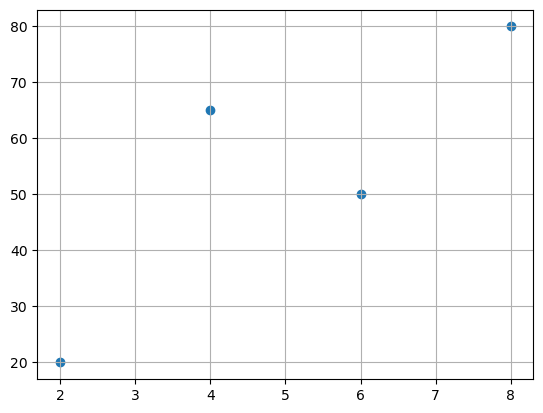

In [58]:
plt.scatter(x, y)
plt.grid()
plt.show()

In [60]:
a * 5 + b      # 만약 5시간 공부했다고할때 나올 점수 예측 가능

53.749999999999986